In [1]:
import pandas as pd

# ECS7024 Statistics for Artificial Intelligence and Data Science

## Coursework 1

This notebook will analyse data on the amount of people exiting London Underground stations. It will look specifically at underground peak times, the amounts of exits during these periods, the proportions of exits during these times, and proportions of exits at morning peak times compared to evening peak times. It will then be able to give an estimate of whether certain London underground stations serve predominantly residential or work areas, or a mixture of the two. An example of this will be shown looking at a selection of underground stations that are on the Northern Line.

 1. Section 1: Computing Proportions
     1. Exits data set
     1. AM and PM peak totals
     1. Peak proportions of total exits
 
 2. Section 2: Plotting and Analysing Distributions
     1. Descriptive data frame
     1. Histograms
     1. Analysis of the distributions
      
 3. Section 3: Classifying Stations
     1. Peak proportion difference
     1. Classifying stations
     1. Northern Line


##  Section 1: Computing Proportions
### Section 1. A. Exits Data Set

This notebook looks at a dataset from 2017 on exits from the London underground stations. The data was generated by Transport for London and relates to a week day. The day of the week is not specified except that it is not Saturday or Sunday. The precise data gathering process is not known but we assume they mainly used data from the automatic ticket barrier, supplemented by counts taken by staff.

Below is a data frame showing the total number of exits from any given underground station for every hour the station is open, 5am (H05) to 1am (H01) the following morning.

In [2]:
exits = pd.read_csv('hourlyExits.csv',index_col='Station')
exits

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,283,364,467,333,183,146,139,108,53,10
Wood Green,17,154,450,831,884,557,528,604,705,802,...,1554,2334,2606,1802,1123,862,799,773,497,78
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,455,665,646,354,187,117,101,71,28,4


### Section 1. B. AM and PM peak totals

As this document is concerning peak times, the next data frame presents the total number of exits during AM peak hours and PM peak hours for each station.

The morning peak times of the london underground are considered to be H07 - H09, and the evening peak times are considered to be H16 - H18. Therefore to get the total number of exits for the AM peak times for each station, the number of exits for H07, H08, H09 were summed for each row, and for the PM peak times the number of exits for H16, H17, H18 were summed for each row. These values were then added to new columns (titled AM_peak_totals and PM_peak_totals respectively) and were added to a new data frame.


In [3]:
peak_counts = pd.DataFrame()
peak_counts = peak_counts.assign(AM_peak_totals = exits.loc[:, 'H07':'H09'].apply(sum, axis=1))
peak_counts = peak_counts.assign(PM_peak_totals = exits.loc[:, 'H16':'H18'].apply(sum, axis=1))
peak_counts

,AM_peak_totals,PM_peak_totals
Station,,
Acton Town,1970,2628
Aldgate,7408,2992
Aldgate East,7618,3803
Alperton,856,1847
Amersham,424,1465
...,...,...
Wimbledon Park,497,1114
Wood Green,2165,6494
Wood Lane,1798,1766


### Section 1. C. Peak Proportions of total exits
As some stations have more users than others, having a total number of exits in the AM and PM does not give the whole story of how busy a station is at these peak times. To understand how busy a station is at these peak times in comparison to other times of the day, the proportion of exits should be calculated.

The following data frame has two additional columns showing the proportion of exits during the AM and PM peaks, with regards to the total exits for a full day from that station.

This was calculated by first summing the exits of each station, and adding this as a column (Total) to a new data frame (totals). Then to calculate the AM peak total exits as a proportion of the stations total exits, the AM_peak_totals value was divided by the total value of exits from that station. This was then organised into a column titled 'AM_peak_proportion' and added to the peak_counts data frame. The same process was done to calculate the PM_peak_totals as a proportion. These values were added as a column titled 'PM_peak_proportion'.


In [4]:
totals = pd.DataFrame().assign(Total = exits.apply(sum, axis=1))
peak_counts = peak_counts.assign(AM_peak_proportion = (peak_counts['AM_peak_totals'] / totals['Total']))
peak_counts = peak_counts.assign(PM_peak_proportion = (peak_counts['PM_peak_totals'] / totals['Total']))
peak_counts

,AM_peak_totals,PM_peak_totals,AM_peak_proportion,PM_peak_proportion
Station,,,,
Acton Town,1970,2628,0.210425,0.280709
Aldgate,7408,2992,0.459098,0.185424
Aldgate East,7618,3803,0.359238,0.179336
Alperton,856,1847,0.167253,0.360883
Amersham,424,1465,0.108579,0.375160
...,...,...,...,...
Wimbledon Park,497,1114,0.150789,0.337985
Wood Green,2165,6494,0.114013,0.341987
Wood Lane,1798,1766,0.272012,0.267171


## Section 2: Plotting and Analysing Distributions
### Section 2. A. Descriptive Statistics

Now this notebook will look at descriptive statistics of the data frame created above. This will give a clearer picture of the travel behaviour of Londoners during peak hours.

Below is a data frame displaying the descriptive statistics of the AM and PM peak total exits as well as their peaks proportion of total exits. This includes their count, mean, standard deviation, minimum, maximum and quartiles.

In [5]:
peak_counts.describe()

,AM_peak_totals,PM_peak_totals,AM_peak_proportion,PM_peak_proportion
count,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,0.207132,0.298750
std,8181.784059,6276.463316,0.122161,0.087724
min,27.000000,239.000000,0.045302,0.084630
25%,677.500000,1471.750000,0.116120,0.240947
50%,1517.000000,2622.000000,0.169378,0.307397
75%,4315.250000,4707.750000,0.266443,0.361596
max,61116.000000,59486.000000,0.630427,0.496079


Something that stands out from the data above is that the mean of the PM peak proportion is higher than that of the AM peak proportion, while it's standard deviation is lower. This suggests that there more stations in the PM peak with a higher proportion of exits than in the AM peaks. However, the maximum value of the AM peak proportion (0.63) suggests that there is at least one station that has most of its total exits during the AM peak period. These can often be seen better using visualisation.

### Section 2. B. Histograms

The descriptive data can be visualised by plotting a histgram. The histograms below show the distributions of AM peak proportion and PM peak proportion respectively, where the x axis represents the peak proportion and the y axis represents the frequency of stations with that peak proportion.

array([[<AxesSubplot:title={'center':'AM_peak_proportion'}>],
       [<AxesSubplot:title={'center':'PM_peak_proportion'}>]],
      dtype=object)

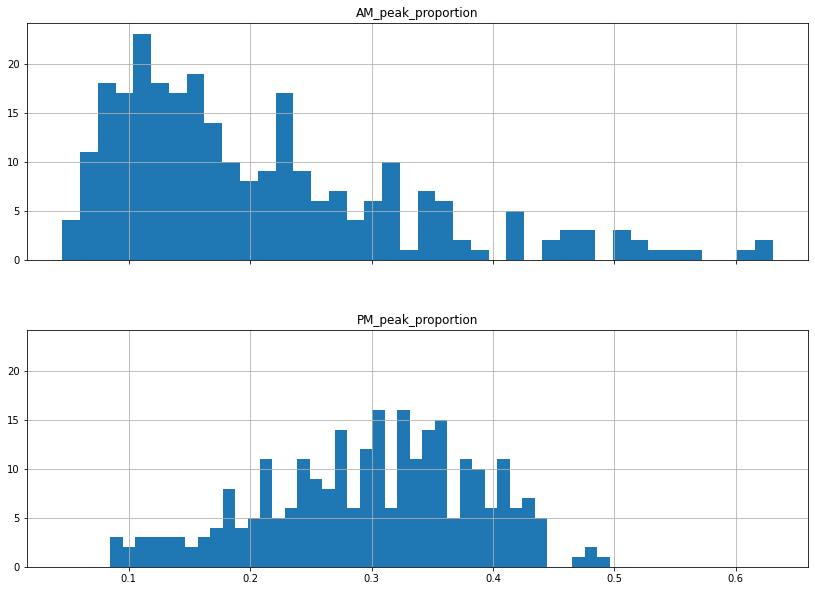

In [6]:
peak_counts.hist(bins=40, figsize=(14,10), layout=(2, 1), column = ['AM_peak_proportion',
       'PM_peak_proportion'], sharex = True, sharey = True)

### Section 2. C. Analysis of the distributions

AM - Positively skewed with a long tail. Positive skew suggests that there are many stations that have a low proportion of their overall exits during the AM peak times. The long tail shows that there are a few stations that have a very high proportion of their total exits (over half in some cases) during the AM peak times. As many of the exits during the AM peak hours would be people commuting to work, the distribution suggests that there are a few places where there is an extremely high concentration of work places and much lower concentration of work places elsewhere.

PM - Slightly negatively skewed / approximately normal with a small tail. As the PM peak exits would tend to be people commuting home from work, the distribution suggests that residential areas are spread fairly evenly across London, with a few stations that have particularly low proportions of residents.

Looking at both histograms together would suggests that there are more predominantly residential areas of London than there are predominantly work areas.

## Section 3: Classifying Stations

### Section 3. A. Peak proportion difference

The above descriptive data demonstrates that some areas of London have a big proportion of work places compared to residential and vice versa. To get a more detailed understanding of which areas are predominantly areas of work, and which areas are predominantly residential, this notebook will analyse the difference between the proportion of AM peak exits and the proportion of the PM peak exits.

If the proportion of AM exits is greater than the proportion of PM exits it would suggest that that station is predominantly an area of work, whereas if the proportion of PM exits is greater than the proportion of AM exits it would suggest that the station is predominantly a residential area.

In the below dataframe two more columns have been added to the peak_counts dataframe. The first 'peak_prop_difference' contains values for each row showing the difference between the AM peak proportion and the PM peak proportion. This was done by subtracting the PM_peak_proportion from the AM_peak_proportion and assigned to a new column. The second column added 'peak_totals_difference' contains values for each row showing the difference between the AM peak totals and the PM peak totals. This was done by subtracting the PM_peak_totals from the AM_peak_totals and assigned to a new column.

In [7]:
peak_counts = peak_counts.assign(peak_prop_difference = (peak_counts['AM_peak_proportion'] - peak_counts['PM_peak_proportion']))
peak_counts = peak_counts.assign(peak_totals_difference = (peak_counts['AM_peak_totals'] - peak_counts['PM_peak_totals']))

In [8]:
peak_counts

,AM_peak_totals,PM_peak_totals,AM_peak_proportion,PM_peak_proportion,peak_prop_difference,peak_totals_difference
Station,,,,,,
Acton Town,1970,2628,0.210425,0.280709,-0.070284,-658
Aldgate,7408,2992,0.459098,0.185424,0.273674,4416
Aldgate East,7618,3803,0.359238,0.179336,0.179902,3815
Alperton,856,1847,0.167253,0.360883,-0.193630,-991
Amersham,424,1465,0.108579,0.375160,-0.266581,-1041
...,...,...,...,...,...,...
Wimbledon Park,497,1114,0.150789,0.337985,-0.187197,-617
Wood Green,2165,6494,0.114013,0.341987,-0.227974,-4329
Wood Lane,1798,1766,0.272012,0.267171,0.004841,32


### Section 3. B. Classifying stations

There are some stations such as Wood Lane where the difference between the AM_peak_totals and PM_peak_totals is so small (in this case 32 exits difference as seen in the table above) that it is unlikley that this is predominantly a work area, as on a different day it could by chance be have more PM peak exits than AM peak exits. Therefore, to ensure that the difference between the AM peak and the PM peak is significant a threshold should be taken, where if the difference in the peak proportions is above a certain threshold it is classified as 'Work', if it is below a certain theshold it is classified as 'Residential', and if it is between the two thresholds it is classified as 'Other'.

One important factor to consider when choosing a threshold is to consider stations with fewer total exits, as these stations could sway more easily from a residential area to a working area, depending on the day. For example, given a station with 100 total exits, with a 10% threshold there would only be 20 exits during peak hours between the station being classified as a work area and the station being classified as a residential area. This station could then easily be classified incorrectly due to chance. Therefore to minimise the chance of this error it is importnat to look at the descriptive statistics of the total exits as seen below.

In [9]:
totals.describe()

,Total
count,268.000000
mean,17194.477612
std,23480.190142
min,596.000000
25%,4889.500000
50%,9210.000000
75%,19999.500000
max,149258.000000


The dataframe above shows that the minimum total exits for a station is 596, therefore if a 5% threshold was taken the difference between the station being classified as residential or work would be approximately 60 people. It is reasonable to assume that the difference in exits of peak times could change by 60 people by chance. However, if a 10% threshold was taken the difference between the station being classified as residential or work would be approximately 120 people. It is fair to assume that in a station with only 596 total daily exits, it is unlikely that the difference in AM and PM peak exits would by chance change by 120 exits, and therefore unlikely to be classified incorrectly. Therefore, this analysis will use a 10% threshold to classify the stations. If there was more data to analyse, which included counts of several weekdays, a distribution of daily exits per station could be analysed. From this, the difference in the daily exits could be analysed and a more accurate threshold could be implemented.

With a 10% threshold, for a station to be classified as a work area the difference between the AM and PM peak should be equal or greater than 10%, therefore if the peak proportion difference column has a value of 0.1 or more it will be classified as 'work'. For a station to be classified as residential area the difference between the AM and PM peak should also be equal or greater than 10%, therefore if the peak proportion difference column has a value of -0.1 or less it will be classified as 'residential'. Any station that has a peak proportion difference between -0.1 and 0.1, does not fall into either the 'residential' or 'work' class and should be classified as 'other'

To do this, each row is run through a function 'stationClass'. This function assess whether the peak proportion difference is above 0.1, below -0.1 or between -0.1 and 0.1, and assigns a class to that station (work, residential or other respectively). This new column 'station_class' is then added to the data frame.

In [10]:
def stationClass(row):
    if (row.peak_prop_difference >= 0.1) : return 'Work'
    if (row.peak_prop_difference <= -0.1) : return 'Residential'
    if (row.peak_prop_difference < 0.1) & (row.peak_prop_difference > -0.1) : return 'Other'
    
peak_counts = peak_counts.assign(station_class = peak_counts.apply(stationClass, axis=1))
peak_counts

,AM_peak_totals,PM_peak_totals,AM_peak_proportion,PM_peak_proportion,peak_prop_difference,peak_totals_difference,station_class
Station,,,,,,,
Acton Town,1970,2628,0.210425,0.280709,-0.070284,-658,Other
Aldgate,7408,2992,0.459098,0.185424,0.273674,4416,Work
Aldgate East,7618,3803,0.359238,0.179336,0.179902,3815,Work
Alperton,856,1847,0.167253,0.360883,-0.193630,-991,Residential
Amersham,424,1465,0.108579,0.375160,-0.266581,-1041,Residential
...,...,...,...,...,...,...,...
Wimbledon Park,497,1114,0.150789,0.337985,-0.187197,-617,Residential
Wood Green,2165,6494,0.114013,0.341987,-0.227974,-4329,Residential
Wood Lane,1798,1766,0.272012,0.267171,0.004841,32,Other


### Section 3. C. Northern Line Stations

Information about any particular station and their class can now be accessed. Below, a selection of Northern Line stations have been highlighted (Archway, Balham, Embankment, Goodge Street, Highgate, High Barnet, Leicester Square, Morden, South Wimbledon, Tottenham Court Road and Warren Street).

In [11]:
peak_counts.loc[('Archway', 'Balham', 'Embankment', 'Goodge Street', 'Highgate', 'High Barnet', 'Leicester Square',
                   'Morden', 'South Wimbledon', 'Tottenham Court Road', 'Warren Street'), :]


,AM_peak_totals,PM_peak_totals,AM_peak_proportion,PM_peak_proportion,peak_prop_difference,peak_totals_difference,station_class
Station,,,,,,,
Archway,2190,4106,0.157158,0.294654,-0.137496,-1916,Residential
Balham,2637,7635,0.119170,0.345038,-0.225868,-4998,Residential
Embankment,10692,8829,0.316509,0.261360,0.055149,1863,Other
Goodge Street,5374,1949,0.419287,0.152064,0.267223,3425,Work
Highgate,893,3170,0.100101,0.355341,-0.255240,-2277,Residential
High Barnet,987,2362,0.144235,0.345170,-0.200935,-1375,Residential
Leicester Square,8952,12915,0.187390,0.270347,-0.082957,-3963,Other
Morden,1550,5955,0.098852,0.379783,-0.280931,-4405,Residential
South Wimbledon,1335,2198,0.185494,0.305405,-0.119911,-863,Residential


From the 11 stations selected there are 6 stations that have been classified as 'Residential', 3 stations as 'Work' and  2 stations as 'Other'. When looking at these with regards to a map of the London Underground (https://content.tfl.gov.uk/standard-tube-map.pdf), the stations have been classified as one would expect. All six of the stations classed as 'Residential' are in zones 3-5 (towards the outer parts of London), while all stations classed as 'Work' are in zone 1 (central London), suggesting that there are more residential areas on the outskirts of London and there are more areas of work towards the centre of London. All stations classed as 'Other' are also based in zone 1. The reason that the proportions of AM and PM peak exits are relatively even in these stations may be due to higher proportions of exits throughout the day due to tourism.